## combine all parts_without_img fils
# dont forgout products_name_ar for all products

In [8]:
import pandas as pd

def merge_and_sort_csv(file_paths, output_file):
    # Lire et concaténer tous les fichiers CSV
    df_list = [pd.read_csv(file) for file in file_paths]
    merged_df = pd.concat(df_list, ignore_index=True)
    
    # Trier par 'brand_name' ascendant et 'Year' descendant
    sorted_df = merged_df.sort_values(by=['brand_name', 'Year'], ascending=[True, False])
    # Supprimer les doublons en fonction des colonnes spécifiques
    sorted_df = sorted_df.drop_duplicates(subset=['products_img', 'frontOrRear', 'products_name', 'Year', 'Model'], keep='first')
    sorted_df = sorted_df.drop(columns=['first_img_src'])
    # Enregistrer le fichier résultant
    sorted_df.to_csv(output_file, index=False)
    print(f"Fichier sauvegardé sous: {output_file}")

# Exemple d'utilisation:
file_paths = [
    '../results_0/without_img_price/rows_without_img.csv',
    '../results_1/combined_brands/without_img_price/rows_without_img.csv',
    '../results_2/combined_brands/without_img_price/rows_without_img.csv'
]

output_file = 'results/products_without_img.csv'
merge_and_sort_csv(file_paths, output_file)

Fichier sauvegardé sous: results/products_without_img.csv


In [16]:
pd.read_csv(output_file)

,trader_id,description,manufacturer_part_number,brand_name,address,products_img,madeIn,price,is_offer,offer_price,...,warranty,disabled_at,updated_at,status,qtyInStock,deletedAt,Brand,Year,Model,products_name_ar
0,16,2.0L L4 Turbocharged Wiper & Washer [],HO1289117,ACURA,"[{""address"":""Acura Almulla, Car Dealer Rd, Kuw...",NaN,NaN,Out of Stock,0,0,...,NaN,NaN,NaN,Accepted,500,NaN,ACURA,2024,INTEGRA,أنبوب تعبئة خزان سائل غسيل الزجاج الأمامي
1,16,"2.0L L4 Turbocharged Cooling System ['ACURA', ...",HO3013100,ACURA,"[{""address"":""Acura Almulla, Car Dealer Rd, Kuw...",NaN,NaN,Out of Stock,0,0,...,NaN,NaN,NaN,Accepted,500,NaN,ACURA,2024,RDX,تركيب الردياتير
2,16,1.5L L4 Turbocharged Transmission-Automatic ['...,TP0894,ACURA,"[{""address"":""Acura Almulla, Car Dealer Rd, Kuw...",NaN,NaN,Out of Stock,0,0,...,NaN,NaN,NaN,Accepted,500,NaN,ACURA,2023,INTEGRA,صينية السوائل
3,16,"2.0L L4 Turbocharged Cooling System ['ACURA', ...",HO3013100,ACURA,"[{""address"":""Acura Almulla, Car Dealer Rd, Kuw...",NaN,NaN,Out of Stock,0,0,...,NaN,NaN,NaN,Accepted,500,NaN,ACURA,2023,RDX,تركيب الردياتير
4,16,"1.5L L4 Turbocharged Wiper & Washer ['ACURA', ...",HO1289117,ACURA,"[{""address"":""Acura Almulla, Car Dealer Rd, Kuw...",NaN,NaN,Out of Stock,0,0,...,NaN,NaN,NaN,Accepted,500,NaN,ACURA,2023,INTEGRA,أنبوب تعبئة خزان سائل غسيل الزجاج الأمامي
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,16,"2.4L L5 Brake & Wheel Hub ['ALFA ROMEO', '1925...",1100MTV,VOLVO,"[{""address"":""Acura Almulla, Car Dealer Rd, Kuw...",NaN,NaN,Out of Stock,0,0,...,NaN,NaN,NaN,Accepted,500,NaN,VOLVO,2005,V70,NaN
13736,16,"2.4L L5 Drivetrain ['VOLVO', 'S60', '2003-2009...",A60007,VOLVO,"[{""address"":""Acura Almulla, Car Dealer Rd, Kuw...",NaN,NaN,Out of Stock,0,0,...,NaN,NaN,NaN,Accepted,500,NaN,VOLVO,2005,V70,NaN
13737,16,"2.4L L5 Electrical-Connector ['ACURA', '1993-2...",CON30,VOLVO,"[{""address"":""Acura Almulla, Car Dealer Rd, Kuw...",NaN,NaN,Out of Stock,0,0,...,NaN,NaN,NaN,Accepted,500,NaN,VOLVO,2005,V70,NaN
13738,16,"2.4L L5 Engine ['VOLVO', 'C30', '2007-2013', '...",OPVO17L,VOLVO,"[{""address"":""Acura Almulla, Car Dealer Rd, Kuw...",NaN,NaN,Out of Stock,0,0,...,NaN,NaN,NaN,Accepted,500,NaN,VOLVO,2005,V70,NaN


In [4]:
import pandas as pd

def create_string_list_from_columns(csv_file):
    # Lire le fichier CSV
    df = pd.read_csv(csv_file)
    # Remplacer les valeurs NaN dans 'frontOrRear' par une chaîne vide
    df['frontOrRear'] = df['frontOrRear'].fillna('')
    df = df.drop_duplicates(subset=['frontOrRear', 'products_name','Model'], keep='first')
    # Créer une liste des chaînes de caractères en combinant les colonnes
    string_list = df.apply(lambda row: f"{row['brand_name']} {row['Model']} {row['Year']} {row['products_name']} {row['frontOrRear']}", axis=1)
    
    # Convertir en liste Python
    string_list = string_list.tolist()
    
    return string_list

csv_file = 'results/products_without_img.csv'
string_list = create_string_list_from_columns(csv_file)

# Afficher la liste des chaînes de caractères
for string in string_list:
    print(string)

ACURA INTEGRA 2024 Windshield Washer Fluid Reservoir Fill Pipe 
ACURA RDX 2024 Radiator fitting 
ACURA INTEGRA 2023 Fluid Tray 
ACURA RDX 2022 Turbo Oil Line Gasket/O-Ring 
ACURA TLX 2022 Turbo Oil Line Gasket/O-Ring 
ACURA MDX 2020 Airbag Clock Spring 
ACURA TLX 2020 Airbag Clock Spring 
ACURA RLX 2020 Airbag Clock Spring 
ACURA RLX 2016 Coolant Line 
ACURA TLX 2016 Seat Lumbar Support Switch 
ACURA MDX 2016 Camshaft Adjustment Magnet Left
ACURA TL 2014 Seat Lumbar Support Switch 
ACURA RL 2012 Seat Lumbar Support Switch 
ACURA TSX 2012 Attachment Shaft 
ACURA ZDX 2011 Seat Lumbar Support Switch 
ACURA TSX 2008 Linear Connector 
ACURA RSX 2006 Linear Connector 
ACURA RSX 2006 Connecting Rod 
ACURA CSX 2006 Rebuild Kit 
ACURA NSX 2005 Clutch Plate Kit 
AUDI Q5 2023 Air Filter Housing 
AUDI SQ5 2023 Parking assist sensor fitting Front Left
AUDI SQ5 2023 Parking assist sensor fitting Front Right
AUDI Q5 2023 Balance Bar Assembly Front
AUDI Q5 2023 External Mirror Turn Signal Right
AUDI Q

In [26]:
# !pip install simple_image_download==0.4

In [5]:
from simple_image_download import simple_image_download as simp
import time, random

In [ ]:
response = simp.simple_image_download

for kw in string_list:
    response().download(kw , 5)
    time.sleep(random.uniform(0.5, 2.5))

[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%


104



 ---- 



 ---- 



 ---- 



 ---- 



 ---- 



 ---- 



 ---- 



 ---- 



 ---- 



 ---- 



 ---- 



 ---- 
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSSBxbsd75RIeRRLSjJsakxIqGzdmzE8AbkOg&s


 ---- 
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==


 ---- 
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==


 ---- 
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==


 ---- 
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==


 ---- 
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==


 ---- 
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==


 ---- 
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==


 ---- 
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==


 ---- 
data:image/gif;base64,R0lGODlhAQABAIAA
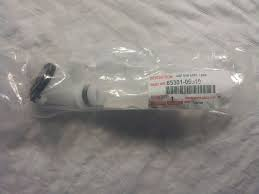
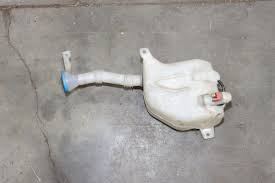
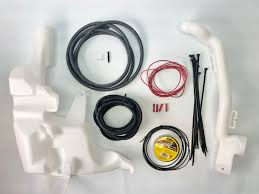
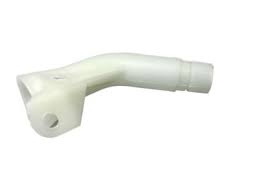
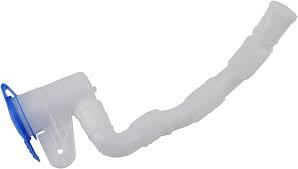
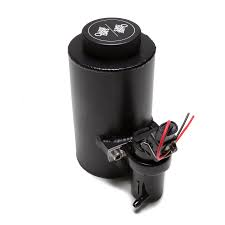
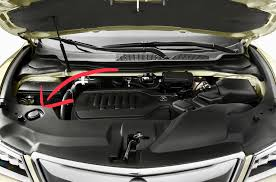
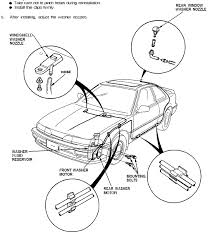
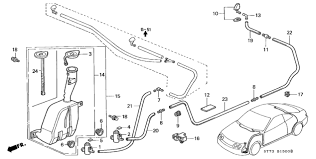
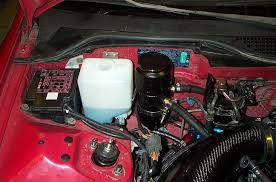
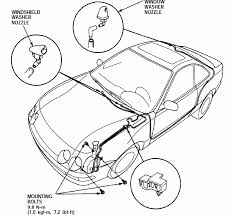
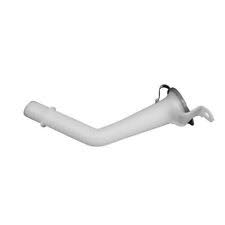

In [14]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.common.keys import Keys
import time , random
import os
import zipfile

options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)

def click_elem(click_elem):
    t=2
    check = 0
    i = 0
    while not check and i<5:
        try:
            click_elem.click()
            time.sleep(t) ######
            check = 1
        except Exception as e:
            check = 0
        i += 1

def get_element(path_to_elem, class_=None, group=False, from_elem=None):
    i = 0
    while i<5:
        try:
            if not class_:
                if not from_elem:
                    if not group:
                        elem = driver.find_element(By.XPATH, path_to_elem)
                    else :
                        elem = driver.find_elements(By.XPATH, path_to_elem)
                    return {"status": True, "data":elem }
                else:
                    if not group:
                        elem = from_elem.find_element(By.XPATH, path_to_elem)
                    else :
                        elem = from_elem.find_elements(By.XPATH, path_to_elem)
                    return {"status": True, "data":elem }
                    
        except Exception as e:
            i += 1
            if i == 5:
                return {"status": False, "data":str(e) }
                
driver.get('https://www.google.com')
#time.sleep(100)

input_search_region = get_element('//*[@id="APjFqb"]')
if input_search_region["status"]:
    input_search_region = input_search_region["data"]
    input_search_region.send_keys(string_list[0])
    input_search_region.send_keys(Keys.ENTER)
else:
    print({"status": False, "data":input_search_region["data"] })
    
time.sleep(5)

images_button = get_element('//*[@id="hdtb-sc"]/div/div/div[1]/div/div[2]/a')
if images_button["status"]:
    images_button = images_button["data"]
    click_elem(images_button)
else:
    print({"status": False, "data":images_button["data"] })


divs_images = get_element('//*[@id="rso"]/div/div/div[1]/div/div/div',group=True)
if divs_images["status"]:
    divs_images = divs_images["data"]
    print(len(divs_images))
    for div_image in divs_images:
        img = get_element('div/h3/a/div/div/div/g-img/img', from_elem=div_image)
        if img["status"]:
            img = img["data"]
            print(img.get_attribute('src'))
            print('\n\n ---- ')
        else:
            print('-----------------------')
else:
    print({"status": False, "data":divs_images["data"] })


# for kw in string_list:
#     driver.get(kw)
#     time.sleep(100)
#     break